In [ ]:
- 스퀄, 디비도 같이 많이 섞어보면 좋음
- 프론트엔드(쟝고, 플라스크)
- 이티엘
- 시각화

#### 배경

많은 사람들이 롤을 즐기면서 듀오로 랭겜을 돌린다. 봇 듀오, 미드 탑, 탑 정글 등 많은 조합으로 듀오를 가지만 op.gg나 fow 같은 대표적인 전략 분석 사이트에서는 듀오에 대한 티어 정보를 제공하지 않는다. 그래서 어떤 조합의 챔피언들이 가장 티어가 높을까?라는 호기심에서 이 분석을 진행하기로 했다.\
나는 주로 미드를 가고 정글 가는 친구와 듀오를 자주 하기 때문에 최적의 "미드 정글 듀오 챔피언 조합"을 찾아 티어별로 정리해보는 것을 목표로 한다.\
조금 더 구체적으로 현재 내 티어가 플래티넘4 이기 때문에 플래티넘4 구간의 데이터만 불러와서 살펴 봤다.


처음으로 진행하는 분석이기도 하며 데이터 공부를 목적으로 한 분석이기에 중간 중간에 개념에 대한 정리가 포함 되어 있다.

### 1. 데이터 불러오기

In [184]:
import numpy as np
import pandas as pd
import json
import requests
import time
import warnings
warnings.filterwarnings(action='ignore')

In [185]:
# 볼 수 있는 행,열 개수 설정
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

 라이엇에서는 게임과 관련된 모든 데이터를 "developer.riotgames.com"에서 제공하고 있다.\
데이터를 불러오기 위해서는 api_key를 넣어줘야 하는데 키는 매 24시간 마다 만료되므로 매일 갱신시켜줘야한다.\
그렇지 않고 실수로 만료된 key로 데이터를 불러올 경우 블랙리스트에 올라 하루동안 아이디가 일시 정지 될 수도 있기에 주의해야 한다.

#### API란?

API는 프로그램들이 서로 상호작용하는 것을 도와주는 매개체
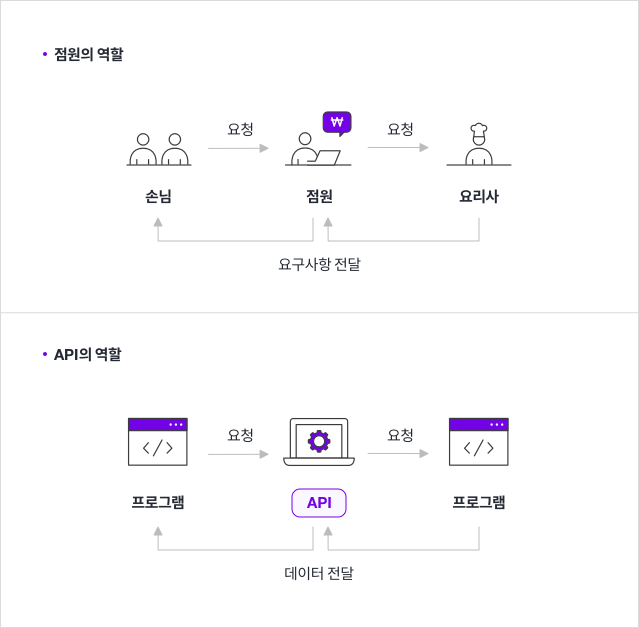
#### API의 역할은? 
 

1. API는 서버와 데이터베이스에 대한 출입구 역할을 한다.
: 데이터베이스에는 소중한 정보들이 저장된다. 모든 사람들이 이 데이터베이스에 접근할 수 있으면 안 된다. API는 이를 방지하기 위해 여러분이 가진 서버와 데이터베이스에 대한 출입구 역할을 하며, 허용된 사람들에게만 접근성을 부여해준다.

2. API는 애플리케이션과 기기가 원활하게 통신할 수 있도록 한다.
: 여기서 애플리케이션이란 우리가 흔히 알고 있는 스마트폰 어플이나 프로그램을 말합다. API는 애플리케이션과 기기가 데이터를 원활히 주고받을 수 있도록 돕는 역할을 합다.

3. API는 모든 접속을 표준화한다.
API는 모든 접속을 표준화하기 때문에 기계/ 운영체제 등과 상관없이 누구나 동일한 액세스를 얻을 수 있다. 쉽게 말해, API는 범용 플러그처럼 작동한다고 볼 수 있다.


#### 파이썬에서 request를 이용해 데이터 불러오기 
Python requests

Python에서 HTTP 요청을 보내는 모듈 = requests

0. 기본적인 사용방법
URL = 'http://whateverthewebsites.com'
response = requests.get(URL) - 이 URL에 요청을 보냈고

response.statues_code - 요청을 받아 뭔가를 처리한 후 요청자인 나에게 응답을 줬고 200, 400,429

response.text - HTML 코드 확인

1. GET 요청할때 parameter 전달법

params = {'param1': 'value1', 'params2': ' value'}\
res = requests.get(URL, params = params)

ex)\
params = {'key':'value'}\
res = requests.get('http://whateverthewebsite.com', params = parmas)\
res.url - 내가 던진 URL이 뭔지 확인하는 법

2. POST 요청할 때 data 전달법\
data = {'param1' : 'value1', 'param2' : 'value'}\
res = requests.post(URL, data = data)\
*우리가 인지하고 있는 딕셔너리 구조를 유지하면서 문자열로 바꿔서 전달할때 json 모듈\
import requests, json\
data = {'outer' : {'inner' : 'value'}}\
res = requests.post(URL, data = json.dump(data))\

3. 헤더 추가, 쿠키추가

headers = {'Content-Type': 'application/json; charset = utrf-8'}\
cookies = {'seession_id':'sorryidontcare'}\
res = requests.get(URL, headers = headers, cookies=cookies)\

4.res. 치면 기능들 다나옴
ex)\
res.requests - 내가 보낸 request 객체에 접근 가능\
res.status_code 응답 코드\
res.raise_for_status 200 OK 코드가 아닌 경우 에러 발동\
res.json() json response일 경우 딕셔너리 타입으로 바로 변환. 


#### api key 업데이트 및 game_version 확인

In [186]:
#version 확인 및 api_key update.

api_key = 'RGAPI-bd6912a3-e2c0-48fe-846f-c8bde4f2b5c5' # Key를 갱신하여야 한다
params = {'api_key' : 'RGAPI-bd6912a3-e2c0-48fe-846f-c8bde4f2b5c5'}
r = requests.get('https://ddragon.leagueoflegends.com/api/versions.json') # version data 확인
current_version = r.json()[0] # 가장 최신 버전 확인
current_version

'11.1.1'

#### 챔피언 데이터 불러오기

In [187]:
#챔피언들에 대한 정보를 developer 사이트에서 가져옴
r = requests.get('http://ddragon.leagueoflegends.com/cdn/{}/data/ko_KR/champion.json'.format(current_version))
parsed_data = r.json() # 파싱
info_df = pd.DataFrame(parsed_data)
info_df.head()

,type,format,version,data
Aatrox,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Aatrox', 'key': '..."
Ahri,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Ahri', 'key': '10..."
Akali,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Akali', 'key': '8..."
Alistar,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Alistar', 'key': ..."
Amumu,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Amumu', 'key': '3..."


DataFrame 내에 딕셔너리 형태의 column이 존재하는데 여기서에서 챔피언 'key'와 같이 필요한 column들만 빼서 기존 df에 추가하는 function 만듦

In [188]:
# 원하는 데이터 추출해서 기존 DF에 추가하는 function. 
def extract_column(df, high_column, low_column):
    df.loc[:, low_column] = df.loc[:, high_column].map(lambda x: x[low_column])

In [189]:
#data columns에서 필요한 'key' 값을 빼온 뒤 확인.
extract_column(info_df, 'data', 'key')
info_df = info_df.reset_index()
info_df

,index,type,format,version,data,key
0,Aatrox,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Aatrox', 'key': '...",266
1,Ahri,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Ahri', 'key': '10...",103
2,Akali,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Akali', 'key': '8...",84
3,Alistar,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Alistar', 'key': ...",12
4,Amumu,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Amumu', 'key': '3...",32
...,...,...,...,...,...,...
148,Zed,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Zed', 'key': '238...",238
149,Ziggs,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Ziggs', 'key': '1...",115
150,Zilean,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Zilean', 'key': '...",26
151,Zoe,champion,standAloneComplex,11.1.1,"{'version': '11.1.1', 'id': 'Zoe', 'key': '142...",142


#### 스펠 데이터 불러오기

In [190]:
#마찬가지로 스펠 데이터 불러옴
r = requests.get('http://ddragon.leagueoflegends.com/cdn/10.25.1/data/en_US/summoner.json')
parsed_data = r.json()
spell_df = pd.DataFrame(parsed_data)
extract_column(spell_df, 'data', 'key')
extract_column(spell_df, 'data', 'name')
spell_df.head()

,type,version,data,key,name
SummonerBarrier,summoner,10.25.1,"{'id': 'SummonerBarrier', 'name': 'Barrier', '...",21,Barrier
SummonerBoost,summoner,10.25.1,"{'id': 'SummonerBoost', 'name': 'Cleanse', 'de...",1,Cleanse
SummonerDot,summoner,10.25.1,"{'id': 'SummonerDot', 'name': 'Ignite', 'descr...",14,Ignite
SummonerExhaust,summoner,10.25.1,"{'id': 'SummonerExhaust', 'name': 'Exhaust', '...",3,Exhaust
SummonerFlash,summoner,10.25.1,"{'id': 'SummonerFlash', 'name': 'Flash', 'desc...",4,Flash


#### 게임 데이터 불러오기

라이엇에서는 데이터를 불러오는데 2분에 100개씩이라는 제한을 걸어놓았다. \
아마 사람들이 한번에 너무 많은 데이터를 불러오려고 하면 트래픽이 초과되어 서버에 과부화가 올 수 있기 때문인 것 같다.\
그래서 모든 데이터들을 불러온 뒤 csv 파일로 저장해서 시간을 줄였다.\
물론 데이터가 많으면 많을 수록 좋겠지만 이 분석의 목적은 공부이기 때문에 시간을 줄이기 위해 일단 한 20000개 데이터 정도 불러와서 보고 데이터 수가 너무 작은지 판단해 보기로 했다.

플래티넘 유저들의 데이터만 들고오지만 최종적으로 필요한 정보는 게임 내의 미드와 정글 챔피언들의 조합 및 승률, 픽률, 밴률 등이기 때문에 몇번의 과정을 통해 데이터들을 불러와야 한다.

데이터 불러오는 순서
1) league data -> encrypted summonerId\
2) encrypted summnerId -> encrypted account ID\
3) encrypted accountId -> match data의 gameId\
4) gameId -> match 세부데이터

In [191]:
# #플레4 유저 데이터 불러오기.

# platinum_URL1 = 'https://kr.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1'
# r=requests.get(platinum_URL1, params = params)
# user_df = pd.DataFrame(r.json())

# pagenum = range(2,50)

# for i in pagenum: 
#     platinum_URL = 'https://kr.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page={}'.format(i)
#     r= requests.get(platinum_URL, params = params)
#     while r.status_code!=200: # 요청 제한 또는 오류로 인해 정상적으로 받아오지 않는 상태라면, 60초 지연
#         time.sleep(60)
#         r = requests.get(platinum_URL, params = params)
#     user_df = pd.concat([user_df, pd.DataFrame(r.json())])

# user_df.to_csv('PlatinumIVData.csv')

# 저장된 데이터 받아오기
user_df = pd.read_csv('PlatinumIVData.csv', index_col=0)
user_df.reset_index(inplace=True)
user_df

,index,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,miniSeries
0,0,7f6e3f73-8959-479d-93e7-55f53723504a,RANKED_SOLO_5x5,PLATINUM,IV,lo-VVRltoxof-68ApOYeCxkaJkzt319W6xDpaP39VtOctPVo,마왕Ex 볼디고드,0,97,81,False,False,True,True,NaN
1,1,cff06d45-789d-4219-a5b7-c7c9fbce8bf0,RANKED_SOLO_5x5,PLATINUM,IV,5FqJ3WNHs3M2WtCDe8r_PV0GJVC61LblAott9azgPghg7i5V,Nxsty,97,53,29,False,False,True,False,NaN
2,2,4658c99e-d299-448c-a614-17424d027b66,RANKED_SOLO_5x5,PLATINUM,IV,GlgC2UQt1uYDgy8N50fl3zB-xeltpPIgVEmPOsfVoy_gqqru,2003 09 05,7,61,43,False,False,False,False,NaN
3,3,e17bb48c-52ca-4f2f-828e-c31b87910315,RANKED_SOLO_5x5,PLATINUM,IV,Ho0P2jO0d5UYnMqVccejvWrQMvVuIRk3_nEST09XxWLcGAtf,H2641,75,228,214,False,False,False,False,NaN
4,4,b72a45a9-12a2-4602-8341-ae5e56fa8828,RANKED_SOLO_5x5,PLATINUM,IV,NFBwk7UVsvig6D_y8WRuRAnvo2-EEhspVNtwZA9o_2vH4SQO,LOL China,52,102,100,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,200,4034b7e7-f025-4ce4-a6a9-5c803ae09b01,RANKED_SOLO_5x5,PLATINUM,IV,Vg75V5aZUkxSaARjsgNKOb-K67pddGMhVyV8W25UfLNp4Q,고니우기,0,227,226,True,False,False,False,NaN
20496,201,a27c8fb7-b742-47aa-a584-7d7dbbc401a5,RANKED_SOLO_5x5,PLATINUM,IV,sFA4zKDeSrP20ivkNLT7ERWVc_-BdLLcKsbYVgYly9DNnw,파란나라를보았니,31,745,732,False,False,False,False,NaN
20497,202,15510391-d370-459c-9a65-1f9617bb8b1f,RANKED_SOLO_5x5,PLATINUM,IV,kfnFRSNyiIQJBN80WgsRUANpvJRuLilAzQHesH6MXynFaA,그냥딱,17,345,331,False,False,False,False,NaN
20498,203,a73844e0-43f7-446a-b1e0-2d82981745b1,RANKED_SOLO_5x5,PLATINUM,IV,vlRn5oCIeNmnegHEps_1iRLdrJ1FHLG1wih_NMi77QQqlw,jakson,61,93,111,False,False,False,False,NaN


In [192]:
# #User_df의 'summonerID'로 'encrypted accountID' 불러옴.
# summonerId를 이용하여 accountId를 모두 받아와야 한다. 요청 제한으로 인해 오래 걸리므로 파일로 저장하여 관리 to_csv
# API 요청 제한 : 1초에 20, 2분에 100
#생각보다 시간이 오래 걸려서 10,000개의 유저 데이터만 가지고 진행.

# user_df['account_id'] = np.nan # account_id 초기화
# for i, summoner_id in enumerate(user_df['summonerId']):
# #각 소환사의 SummonerId와 API Key를 포함한 url을 만들고, Summoner API에서 AccountId를 가져와 채워넣는다.
#     api_url = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/' + summoner_id + '?api_key=' + api_key
#     r = requests.get(api_url)
#     while r.status_code!=200: # 요청 제한 또는 오류로 인해 정상적으로 받아오지 않는 상태라면, 60초 지연
#         time.sleep(60)
#         r = requests.get(api_url)
#     account_id = r.json()['accountId']
#     user_df.iloc[i, -1] = account_id

# user_df.to_csv('LeagueData.csv')

league_df = pd.read_csv('LeagueData.csv',index_col=0)
league_df

,index,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,miniSeries,account_id
0,0,7f6e3f73-8959-479d-93e7-55f53723504a,RANKED_SOLO_5x5,PLATINUM,IV,rFzHZfm0zb-iqDiJnBQIGtoWd1GTsei4GrGymQoyXYu2idu1,마왕Ex 볼디고드,0,97,81,False,False,False,True,NaN,zW2aj1YTjOapsvPS0vOvulMla0zgYdDH-Z44vSPqwEcukC...
1,1,fbe3f3fc-4f22-44ba-976f-47b2c7e01619,RANKED_SOLO_5x5,PLATINUM,IV,u1C4TM6NNLPDMSl9xb2dbaeXh92wOZnntKCdb4Gq-WU_hKjF,응기이이이이이이이이이이이이이잇,92,220,202,False,False,False,False,NaN,kQUw1aSZ5Uv1Cq53SUdynKrm1TWWgvB4mmT7JhwO3NXrXX...
2,2,4658c99e-d299-448c-a614-17424d027b66,RANKED_SOLO_5x5,PLATINUM,IV,zss8bYwSlzXB7D9N7L9N92Cs4VnexshlvUenT7QVooHH2F6k,2003 09 05,0,61,44,False,False,False,False,NaN,cVOOLrTTAmIzwaOs7PJpt8ZCPP22cTGt90-Xu1C_8grpy7...
3,3,d5c66391-7ae0-489f-9bd5-b6ba07070d34,RANKED_SOLO_5x5,PLATINUM,IV,KMPJBTofamUmJLfWodHLvd9jVN1X7qVtSZ3Md_TO0YIWlwJ9,또물보라를일으켜다다다다다다다,2,44,33,False,False,False,False,NaN,FS-gRP7MdHcTYBx-OK2KFK1SgBloytDdZGcOacfJd6pnHx...
4,4,e2ae626b-15f0-4fad-9985-6c8199cf92ac,RANKED_SOLO_5x5,PLATINUM,IV,T4YekmYDKTt51pyFKOtfCimahjZuU4LftAxix792cZoz4iVn,연천 마풍강,0,205,191,False,False,False,False,NaN,KKEZg-xbCasosy2QBhvSvQ6nXyxvoEA_yvGGNDX3FlxYeH...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,200,c014d464-b6ee-4803-8fe4-5d393e7852bd,RANKED_SOLO_5x5,PLATINUM,IV,_BxjinivJmU_f7gapmw7-h_cTW4HXuO2T4V74Gf5eRa1-q0,덤불해오라기,12,267,245,False,False,False,False,NaN,aZ4FeD5AN0nM23x5Wi-zebcNc9R9c5TsRGjfwiMoBFDJ
10041,201,8ed41b3b-4bbd-4fd4-aab8-25821e7dce3f,RANKED_SOLO_5x5,PLATINUM,IV,Pv3WTs6PB3DTagiD_CmGL4B3Nym70qpgD30V4MWWD_ZyuRc,sky시나모로,70,36,17,False,False,False,False,NaN,sbVl40rSBsJW2Caod4l7nZo4D0s-I5Ji1zKxoxis_NBF
10042,202,4c35e182-519a-4956-ba8d-a07b666e5e79,RANKED_SOLO_5x5,PLATINUM,IV,TaNjeJBwTbrSfEohKifdfSIOe7EdjSPM0XMy-8J6UidMgRM,chuparla vajina,0,208,207,False,False,False,False,NaN,FlcJ8RZDZj_bzpizBB-ETJ9XiQrhJZCYDmwBOYGRYm6w
10043,203,71329f98-44f0-4fba-8975-226453d0075c,RANKED_SOLO_5x5,PLATINUM,IV,M1tBL_oCXZmZCsySCj5faIMb5ndD8BF3BDrw0_bH9rBkWMg,산부인과 간호사,0,49,21,False,False,False,True,NaN,AiME2cqvE9KrFhIHTrY8kJSslIw0g1GNbfgQ3iFdnWnl


In [194]:
# #AccountId를 이용해 Match info 데이터 받기 (gameId를 얻기 위해서)
#platinum_URL1 = 'https://kr.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1'
#r=requests.get(platinum_URL1, params = params)
#user_df = pd.DataFrame(r.json())

# season = str(13)

# match_url = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/Mj2S3rdX4NO4y-dJHDr2B3d2vYwNo0B5o7GIPptv1KLb?season=13&api_key=RGAPI-19ded58b-fb57-4de9-b0a4-d33c4b67eac9'
# r = requests.get(match_url)
# match_info_df = pd.DataFrame(r.json()['matches'])
# match_info_df

# for account_id in league_df1['account_id']:
#     api_url = f'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/{account_id}?season={season}&api_key={api_key}'
#     r = requests.get(api_url)
#     while r.status_code!=200: # 요청 제한 또는 오류로 인해 정상적으로 받아오지 않는 상태라면, 5초 간 시간을 지연
#         time.sleep(60)
#         r = requests.get(api_url)
#     match_info_df = pd.concat([match_info_df, pd.DataFrame(r.json()['matches'])])

# match_info_df.to_csv('MatchInfoData.csv')

# 저장된 데이터 받아오기
match_info_df = pd.read_csv('MatchInfoData.csv', index_col=0)
match_info_df.reset_index(inplace=True)
match_info_df


,index,platformId,gameId,champion,queue,season,timestamp,role,lane
0,0,KR,4775472728,81,420,13,1605055261753,DUO_CARRY,BOTTOM
1,1,KR,4775291889,51,420,13,1605053885302,DUO,NONE
2,2,KR,4772178774,81,420,13,1604907524330,DUO_CARRY,BOTTOM
3,3,KR,4766871878,67,420,13,1604708786840,DUO_CARRY,BOTTOM
4,4,KR,4766870521,81,420,13,1604707101240,DUO_CARRY,BOTTOM
...,...,...,...,...,...,...,...,...,...
30095,95,KR,4174638898,412,420,13,1582563659775,DUO_SUPPORT,BOTTOM
30096,96,KR,4174634161,412,420,13,1582561707791,DUO_SUPPORT,BOTTOM
30097,97,KR,4171831444,154,430,13,1582458029617,SOLO,TOP
30098,98,KR,4171724714,98,430,13,1582456379970,DUO_SUPPORT,BOTTOM


In [195]:
# #gameId를 통해 Match 데이터 받기 (경기의 승패, 팀원과 같은 정보들이 담겨있다.)

# match_info_df = match_info_df.drop_duplicates('gameId')

# match_df = pd.DataFrame()
# for game_id in match_info_df['gameId']: # 이전의 매치에 대한 정보 데이터에서 게임 아이디를 가져온다
#     api_url = 'https://kr.api.riotgames.com/lol/match/v4/matches/' + str(game_id) + '?api_key=' + api_key
#     r = requests.get(api_url)
#     while r.status_code!=200: # 요청 제한 또는 오류로 인해 정상적으로 받아오지 않는 상태라면, 5초 간 시간을 지연
#         time.sleep(60)
#         r = requests.get(api_url)
#     r_json = r.json()
#     temp_df = pd.DataFrame(list(r_json.values()), index=list(r_json.keys())).T # 게임 아이디에 대한 매치 데이터를 받아서 추가
#     match_df = pd.concat([match_df, temp_df])

# match_df.to_csv('MatchData.csv') # 파일로 저장

match_df = pd.read_csv('MatchData.csv', index_col=0)

#정확한 통계를 위해 가장 최신의 버전과 클래식 게임에 대한 데이터만 가져오자
match_df = match_df.loc[match_df['gameMode']=='CLASSIC', :]

# 그 중에서도 이번 분석에서는 소환사의 협곡 솔로 랭크와 팀 랭크 게임만 사용한다.
select_indices = (match_df['queueId']==420) | (match_df['queueId']==440) 
match_df = match_df.loc[select_indices, :].reset_index(drop=True)

# DataFrame 내의 리스트들이 파일로 저장되었다가 불러지는 과정에서 문자로 인식됨
for column in ['teams', 'participants', 'participantIdentities']:
    match_df[column] = match_df[column].map(lambda v: eval(v)) # 각 값에 대해 eval 함수를 적용

match_df

,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,teams,participants,participantIdentities
0,4775472728,KR,1605055261753,1865,420,11,13,10.23.343.2581,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."
1,4775291889,KR,1605053885302,969,420,11,13,10.23.343.2581,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."
2,4772178774,KR,1604907524330,1566,420,11,13,10.22.341.643,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."
3,4766871878,KR,1604708786840,1596,420,11,13,10.22.341.643,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."
4,4766870521,KR,1604707101240,1287,420,11,13,10.22.341.643,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21348,4572984192,KR,1597249145611,1648,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."
21349,4572902272,KR,1597244549656,1316,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."
21350,4572815236,KR,1597242450200,1751,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."
21351,4572697671,KR,1597240316310,1745,420,11,13,10.16.330.9186,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':..."


패치 마다 승률이 바뀌는 경우들이 많이 있으나 좀 더 개괄적인 챔프들의 시너지를 보기 위해서 데이터를 많이 필요로 한다고 생각했다.\
만약 시간이 더 많았다면 훨씬 더 많은 데이터들을 riot 서버로 부터 들고와서 패치 기준으로 데이터들을 보면 더 정확했겠지만 시간 관계상 주어진 데이터내에서 조금더 많은 데이터를 확보하기 위해서 시즌을 기준점으로 잡고 분석을 진행했다.

### 2. 데이터 정제

챔피언 조합의 티어를 계산하기 위해서는 매 게임당 미드와 정글 챔피언의 승률, 밴률, 픽률을 알아내야 하기에 이에 대한 작업을 실시 하였다.

#### 2.1 밴 챔프 확인

In [196]:
# # 매치 데이터에서 teams, participants, participantIdentities가 최종적으로 원하는 데이터이다.

# match_teams_df = pd.DataFrame()
# for i in range(len(match_df)):
#     temp_df = pd.DataFrame(match_df['teams'].iloc[i]) # teams 데이터를 2행 짜리 데이터프레임으로 변환
#     temp_df['gameId'] = match_df['gameId'].iloc[i] # teams 데이터에 각 게임의 gameId 추가 (2행 마다 같은 값)
#      # teams 데이터에 있는 bans 데이터를 5개의 변수로 추가한다
#     ban_dict = {i: pd.DataFrame(temp_df['bans'][i]).iloc[:, 0] for i in range(2)} 
#     # 각 팀의 밴픽을 저장
#     temp_ban = pd.DataFrame(ban_dict).T
#     temp_ban.columns = [f'ban{i}' for i in range(1, 6)] # 열 이름 변경
#     temp_df = pd.concat([temp_df, temp_ban], axis=1)

#     match_teams_df = pd.concat([match_teams_df, temp_df])

# match_teams_df.to_csv('MatchTeamsData.csv')

match_teams_df = pd.read_csv('MatchTeamsData.csv', index_col=0).reset_index()
match_teams_df.drop('bans', axis=1, inplace=True)
match_teams_df

,index,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,gameId,ban1,ban2,ban3,ban4,ban5
0,0,100,Win,False,True,True,True,True,True,11,3,1,5,0,2,0,4775472728,117,147,58,11,157
1,1,200,Fail,True,False,False,False,False,False,1,0,0,0,0,0,0,4775472728,147,876,80,84,122
2,0,100,Win,False,True,False,False,False,True,3,0,0,1,0,1,0,4775291889,17,8,25,147,360
3,1,200,Fail,True,False,False,False,True,False,0,0,0,1,0,0,0,4775291889,82,80,157,360,164
4,0,100,Win,True,True,True,False,True,True,7,1,0,2,0,1,0,4772178774,360,420,79,142,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42701,1,200,Fail,True,False,False,False,True,True,4,0,0,3,0,1,0,4572815236,58,17,777,25,245
42702,0,100,Win,False,True,True,False,True,True,11,2,0,2,0,1,0,4572697671,157,7,86,777,51
42703,1,200,Fail,True,False,False,False,False,False,3,0,0,1,0,0,0,4572697671,-1,114,51,91,53
42704,0,100,Fail,False,False,False,False,False,True,0,0,0,0,0,1,0,4569120544,51,22,67,58,2


#### 2.2 승/패 챔프 확인 

In [198]:
# #빈 데이터 프레임 만듦
# match_part_df = pd.DataFrame()

# #lane이랑 win 데이터 뽑아서 미드 정글만 남김.
# for i in range(len(match_df)):
#     a = pd.DataFrame(match_df['participants'].iloc[i])
#     a['gameId'] = match_df['gameId'].iloc[i]
#     extract_column(a, 'timeline', 'lane')
#     extract_column(a, 'stats', 'win')
#     extract_column(a, 'stats', 'neutralMinionsKilled')
#     a = a.loc[(a['lane'] == 'MIDDLE') | (a['lane'] == 'JUNGLE')]
#     match_part_df = pd.concat([match_part_df, a])

# match_part_df.to_csv('MatchParticipantsData.csv')

match_part_df = pd.read_csv('MatchParticipantsData.csv', index_col = 0)
match_part_df.drop(['stats', 'timeline', 'highestAchievedSeasonTier'], axis = 1, inplace = True)
match_part_df

,participantId,teamId,championId,spell1Id,spell2Id,gameId,lane,win,neutralMinionsKilled
0,1,100,104,11,4,4775472728,JUNGLE,True,150
4,5,100,4,14,4,4775472728,MIDDLE,True,24
5,6,200,64,11,4,4775472728,JUNGLE,False,116
9,10,200,105,14,4,4775472728,MIDDLE,False,5
1,2,100,64,11,4,4772178774,JUNGLE,True,123
...,...,...,...,...,...,...,...,...,...
9,10,200,76,11,4,4572815236,JUNGLE,False,151
1,2,100,245,11,4,4572697671,JUNGLE,True,69
4,5,100,142,14,4,4572697671,MIDDLE,True,6
8,9,200,517,1,4,4572697671,MIDDLE,False,12


게임별 챔피언들의 라인과 승, 패 등 필요한 정보들이 모두 담겨 있으나 여기에 명시된 라인들이 진짜로 맞는건지 확인하기 위해 승패의 갯수를 확인 하였다. \
리그오브레전드에서는 각 팀당 정글과 미드 라이너가 1명씩 존재해야하기 때문에 한 게임당 2명의 미드라이너와 2명의 정글러 총 4명의 정보가 존재해야 하는데 만약 이것 보다 작거나 많다면 문제가 있는 것이라 판단되기에 확인을 해 보았다.



In [64]:
#총 17991판의 게임이 있다 
check = pd.DataFrame(match_part_df['gameId'].value_counts()).reset_index()
check.shape

(17991, 2)

In [30]:
#그중 7754개가 정글 미드 총합이 4가 아니다
uncertain_df = check.loc[check['gameId'] != 4]
uncertain_df.rename({'index': 'gameId', 'gameId':'counts'}, axis = 'columns', inplace = True)
uncertain_df.shape

(7754, 2)

확인해본 결과 17991판 중 7754판은 정글과 미드의 총합이 4개가 아니였다. \
어떤 판은 1, 2개인 경우도 있고 많은 경우는 8, 9개 인 판도 있어 그냥 보고 정글과 미드를 구별하기는 어려워 보인다.\
그래서 꽤 많은 데이터 이기는 하지만 시간상의 문제도 있으며 10000개 정도의 데이터 만으로도 충분히 결과를 도출 해 낼 수 있을 것 같아 모두 지웠다. 

만약 시간이 있었다면 2가지 정도의 확실한 방법으로 미드와 정글을 구별 할 수 있을 것 같은데
1. 타임라인에 따라 10분 이내에 미드 라인 쪽에 스탬프가 많이 찍히면 미드, 정글 내에서 스탬프가 많이 찍히면 정글이라고 판단하기\
2. 미드나 정글의 제약 조건을 걸어 두 라인을 확인.ex) 정글 챔프와 미드 챔프 별로 championId를 나누고 정글은 강타를 들어야 하며 정글몹 몇마리 이상 등 등

추후에 있을 다음번 프로젝트에서는 좀 더 시간을 가지고 확실한 방법으로 라인을 구별 해 볼 예정이다.

In [65]:
# 미드 정글 총합이 4개가 아닌 정보는 모두 제외
match_part_df = pd.merge(match_part_df, uncertain_df, how = 'left')
match_part_df = match_part_df.loc[match_part_df['counts'].isnull()]
match_part_df.reset_index(drop = True, inplace = True)
match_part_df.drop(['counts'], axis = 1, inplace = True)
match_part_df

,participantId,teamId,championId,spell1Id,spell2Id,gameId,lane,win,neutralMinionsKilled
0,1,100,104,11,4,4775472728,JUNGLE,True,150
1,5,100,4,14,4,4775472728,MIDDLE,True,24
2,6,200,64,11,4,4775472728,JUNGLE,False,116
3,10,200,105,14,4,4775472728,MIDDLE,False,5
4,3,100,154,11,4,4766871878,JUNGLE,False,95
...,...,...,...,...,...,...,...,...,...
40943,10,200,76,11,4,4572815236,JUNGLE,False,151
40944,2,100,245,11,4,4572697671,JUNGLE,True,69
40945,5,100,142,14,4,4572697671,MIDDLE,True,6
40946,9,200,517,1,4,4572697671,MIDDLE,False,12


제외 하고 난 후 또 확인해 봐야 할 것이 매 게임당 미드 2명 정글 2명이 있는지이다. 물론 한 팀에서 미드를 2명이서 가서 미드가 3명으로 집계될 수는 있으나 그런 판들은 정상적인 판이라고 보기는 어렵다. 이 분석에서는 정상적인 판에서의 미드와 정글 듀오 조합을 보는 것이기 때문에 매판마다 미드와 정글이 각 각 2명씩 있어야 한다.

In [33]:
match_part_df['lane'].value_counts()

JUNGLE    20822
MIDDLE    20126
Name: lane, dtype: int64

정글과 미드 숫자가 동일하지 않다.\
정상적인 게임이라면 정글러들은 강타를 들어야 한다 그래서 강타를 든 챔피언이 정글이라고 볼 수 있겠지만 잠시동안 미드에서 강타를 들고 플레이하는 메타가 있었기에 정글 몹을 잡은 갯수도 함께 고려 하기로 했다.

In [34]:
#df_jg = 정글
df_jg = match_part_df.loc[match_part_df['lane'] == 'JUNGLE']
df_jg.describe()

,participantId,teamId,championId,spell1Id,spell2Id,gameId,neutralMinionsKilled
count,20822.000000,20822.000000,20822.000000,20822.000000,20822.000000,2.082200e+04,20822.000000
mean,5.486168,149.961579,147.820382,9.555470,5.749448,4.647829e+09,123.280809
std,2.884065,50.001186,192.322352,2.900603,3.080199,1.474464e+08,36.726744
min,1.000000,100.000000,1.000000,1.000000,1.000000,3.567652e+09,0.000000
25%,3.000000,100.000000,59.000000,11.000000,4.000000,4.567308e+09,101.000000
50%,5.000000,100.000000,84.000000,11.000000,4.000000,4.697078e+09,122.000000
75%,8.000000,200.000000,141.000000,11.000000,6.000000,4.758533e+09,146.000000
max,10.000000,200.000000,876.000000,21.000000,21.000000,4.798143e+09,332.000000


In [99]:
#df_mid = 미드
df_mid = match_part_df.loc[match_part_df['lane'] == 'MIDDLE']
df_mid.describe()

,participantId,teamId,championId,spell1Id,spell2Id,gameId,neutralMinionsKilled
count,20126.000000,20126.000000,20126.000000,20126.000000,20126.000000,2.012600e+04,20126.000000
mean,5.492000,149.607473,168.482709,10.656266,6.254199,4.648302e+09,11.732933
std,2.870542,49.999701,194.152013,4.659561,4.115014,1.467006e+08,12.422083
min,1.000000,100.000000,1.000000,1.000000,1.000000,3.567652e+09,0.000000
25%,3.000000,100.000000,55.000000,4.000000,4.000000,4.567889e+09,4.000000
50%,5.000000,100.000000,103.000000,12.000000,4.000000,4.697199e+09,8.000000
75%,8.000000,200.000000,236.000000,14.000000,4.000000,4.758459e+09,16.000000
max,10.000000,200.000000,876.000000,21.000000,21.000000,4.798143e+09,250.000000


미드와 정글로 나누어서 데이터를 살펴본 결과 정글러의 정글몹 25%가 101개고 미드의 75%가 16개 이다. 확연하게 차이가 나는 것으로 보아 대부분의 경우는 이 것으로 나뉠 수 있다고 판단했다. 그래서 101과 16의 중간인 58개를 기준으로 판별해 보았다.

더 확실한 방법으로는 정상적인 게임이라고 판단되는 기준 시간인 15분에서 20분 이 전에 끝나버린 게임들은 날려버리고\
남은 게임 데이터들 내에서 15분 내에 먹은 정글 몹의 상위 75%를 기준으로 정글과 미드를 구분하면 더 정확한 결과가 나올 것이라고 생각한다.

In [100]:
#JUNGLE 중 미니언을 58개 이하 먹었다 + 스펠이 강타가 아니다 -> 정글 아웃
idx_nm_1 = df_jg[df_jg['neutralMinionsKilled'] <= 58].index
idx_nm_2 = df_jg.loc[(df_jg['spell1Id'] != 11) & (df_jg['spell2Id'] != 11)].index
df_jg.drop(idx_nm_1, inplace = True)
df_jg = df_jg.drop(idx_nm_2).reset_index(drop = True)
df_jg

,participantId,teamId,championId,spell1Id,spell2Id,gameId,lane,win,neutralMinionsKilled
0,1,100,104,11,4,4775472728,JUNGLE,True,150
1,6,200,64,11,4,4775472728,JUNGLE,False,116
2,3,100,154,11,4,4766871878,JUNGLE,False,95
3,7,200,60,4,11,4766871878,JUNGLE,True,147
4,3,100,64,11,4,4766870521,JUNGLE,True,81
...,...,...,...,...,...,...,...,...,...
20172,6,200,141,11,4,4572902272,JUNGLE,True,101
20173,2,100,517,11,4,4572815236,JUNGLE,True,84
20174,10,200,76,11,4,4572815236,JUNGLE,False,151
20175,2,100,245,11,4,4572697671,JUNGLE,True,69


In [101]:
a = pd.merge(df_jg, df_mid, on = ['gameId', 'win', 'teamId'])
a['win'].value_counts()

True     9945
False    9834
Name: win, dtype: int64

그래도 짝이 안맞다. 그래서 안맞는 나머지 애들은 그냥 삭제했다.

In [122]:
#게임당 정글 2개 데이터
df_jg_only2 = pd.DataFrame(df_jg['gameId'].value_counts())
df_jg_only2.reset_index(inplace = True)

#게임당 미드 2개 데이터
df_mid_only2 = pd.DataFrame(df_mid['gameId'].value_counts())
df_mid_only2.reset_index(inplace = True)
df_mid_only2 = df_mid_only2.loc[df_mid_only2['gameId'] == 2]

#두 DF 합쳐서 기존 데이터와 합치려고 컬럼명 변경
df_only2 = pd.merge(df_jg_only2, df_mid_only2)
df_only2 = df_only2.rename({'index' : 'gameId', 'gameId' : 'counts'}, axis = 'columns')
#gameId로 merge
df_part = pd.merge(match_part_df, df_only2, on = 'gameId')
df_part

,participantId,teamId,championId,spell1Id,spell2Id,gameId,lane,win,neutralMinionsKilled,counts
0,1,100,104,11,4,4775472728,JUNGLE,True,150,2
1,5,100,4,14,4,4775472728,MIDDLE,True,24,2
2,6,200,64,11,4,4775472728,JUNGLE,False,116,2
3,10,200,105,14,4,4775472728,MIDDLE,False,5,2
4,3,100,154,11,4,4766871878,JUNGLE,False,95,2
...,...,...,...,...,...,...,...,...,...,...
38147,10,200,76,11,4,4572815236,JUNGLE,False,151,2
38148,2,100,245,11,4,4572697671,JUNGLE,True,69,2
38149,5,100,142,14,4,4572697671,MIDDLE,True,6,2
38150,9,200,517,1,4,4572697671,MIDDLE,False,12,2


In [123]:
#챔피언들을 한 행에 합치기 위해 정글 미드 두 DF로 나눠서 merge한 후 필요한 데이터만 남김.
df_jg_temp = df_part.loc[df_temp['lane'] == 'JUNGLE']
df_mid_temp = df_part.loc[df_temp['lane'] == 'MIDDLE']
df_win = pd.merge(df_jg_temp, df_mid_temp, on = ['gameId', 'win'])
df_win = df_win.loc[:, ['championId_x', 'championId_y', 'win']]
df_win

,championId_x,championId_y,win
0,104,4,True
1,64,105,False
2,154,245,False
3,60,20,True
4,64,69,True
...,...,...,...
19071,141,238,True
19072,517,104,True
19073,76,91,False
19074,245,142,True


### 3. 승률, 픽률, 밴률 계산

In [125]:
# #승률 계산
# df_win_rate = pd.DataFrame()
# df_win['win_rate'] = np.nan

# for i in range(len(df_win)):
#     e = df_win.loc[(df_win['championId_x'] == df_win['championId_x'][i]) & (df_win['championId_y'] == df_win['championId_y'][i])]
#     f = (e['win'].loc[e['win'] == True].count()/e['win'].count())*100
#     e['win_rate'] = f  
#     e.drop('win', axis = 1, inplace = True)
#     e = e.iloc[:1]
#     df_win_rate = pd.concat([df_win_rate, e])

# df_win_rate.to_csv('df_win_rate.csv')

df_win_rate = pd.read_csv('df_win_rate.csv', index_col = 0)
df_win_rate.reset_index(drop = True, inplace = True)
df_win_rate


,championId_x,championId_y,win_rate
0,104,4,48.235294
1,64,105,35.937500
2,154,245,66.666667
3,60,20,28.571429
4,64,69,44.736842
...,...,...,...
19071,141,238,45.283019
19072,517,104,50.000000
19073,76,91,37.931034
19074,245,142,53.333333


In [129]:
#픽률 계산
#판수 확인해서 = 픽률 확인.
df_pick_rate = pd.DataFrame(df_win_rate.value_counts())
df_pick_rate.reset_index(inplace = True)
df_pick_rate.rename({0:'pick_counts'}, axis = 'columns', inplace = True)

df_pick_rate['pick_rate'] = (df_pick_rate['pick_counts']/df_pick_rate['pick_counts'].count())*100
df_pick_rate['win_rate'] = df_pick_rate['win_rate']

#20판 이하로 플레이 된 애들은 큰 의미 없을 것 같아서 제외 -----> 이거 같은 경우에도 데이터 기반으로 결정을 내리는게 좋음.
df_pick_rate = df_pick_rate.loc[df_pick_rate['pick_counts'] >= 20]
df_pick_rate

,championId_x,championId_y,win_rate,pick_counts,pick_rate
0,64,517,51.655629,151,4.775459
1,64,84,39.669421,121,3.826692
2,64,7,48.717949,117,3.700190
3,64,238,50.000000,112,3.542062
4,64,4,39.090909,110,3.478811
...,...,...,...,...,...
203,121,61,65.000000,20,0.632511
204,245,56,50.000000,20,0.632511
205,64,54,50.000000,20,0.632511
206,245,8,45.000000,20,0.632511


In [130]:
#밴률 계산
df_ban_rate = match_teams_df.loc[:, ['ban1', 'ban2', 'ban3', 'ban4', 'ban5']]
ban = pd.DataFrame()
for i in range(1,6):
    ban1 = pd.DataFrame(df_ban_rate[f'ban{i}'].value_counts())
    ban1 = ban1.reset_index()
    ban1 = ban1.rename({'index' : 'champ_name', f'ban{i}' : 'counts'}, axis = 'columns')
    ban = pd.concat([ban1, ban])

ban = ban.groupby('champ_name')[['counts']].sum()
ban = ban.sort_values(by = 'counts', ascending = False).reset_index()
ban['ban_rate'] = (ban['counts']/ban['counts'].sum())*100
ban

,champ_name,counts,ban_rate
0,360,13467,6.306842
1,122,9825,4.601227
2,238,9779,4.579684
3,157,8037,3.763874
4,104,7868,3.684728
...,...,...,...
148,136,17,0.007961
149,42,14,0.006556
150,163,12,0.005620
151,31,10,0.004683


In [134]:
#승률 픽률 밴률 합친 전체 데이터 프레임
df_all_info = pd.concat([df_pick_rate, ban], axis =1)
df_all_info['champ_name'] = df_all_info['champ_name'].fillna(0)
df_all_info['champ_name'].astype(int)
df_all_info['Ban_rate'] = np.nan
for i in range(len(df_all_info)):
    a = ban.loc[ban['champ_name'] == df_all_info['championId_x'][i]]['ban_rate'].tolist()
    b = ban.loc[ban['champ_name'] == df_all_info['championId_y'][i]]['ban_rate']
    #밴률은 2가지 챔피언이 동시에 밴되는 경우로 할 경우 너무 확률이 적을 것 같아 각 챔피언당 밴률의 반 더했음.
    df_all_info['Ban_rate'][i] = (a+b)/2
df_all_info = df_all_info[['championId_x', 'championId_y', 'win_rate', 'pick_rate', 'Ban_rate', 'pick_counts']]
df_all_info

,championId_x,championId_y,win_rate,pick_rate,Ban_rate,pick_counts
0,64,517,51.655629,4.775459,2.099939,151
1,64,84,39.669421,3.826692,2.726783,121
2,64,7,48.717949,3.700190,1.852199,117
3,64,238,50.000000,3.542062,3.317332,112
4,64,4,39.090909,3.478811,1.163303,110
...,...,...,...,...,...,...
203,121,61,65.000000,0.632511,0.340467,20
204,245,56,50.000000,0.632511,1.264459,20
205,64,54,50.000000,0.632511,1.447572,20
206,245,8,45.000000,0.632511,1.318082,20


승률과 픽률은 챔프들이 동시에 픽 되었을 때의 경우의 수로 계산을 했지만\
밴률 같은 경우에는 한경기당 10개의 챔피언들이 밴 되기 때문에 동시에 밴되는 것이 의미가 없다고 판단 했다. 그래서 밴률은 두 챔피언의 밴률을 더한 값에 2를 나눠준 값으로 설정 했다.

승률과 픽률은 두 챔피언이 동시에 픽되었을때를 기준으로 함\
승률 = 두 챔피언이 동시에 픽되었을때 승리 판수/ 두 챔피언이 픽되었을 때 전체 판수\
픽률 = 두 챔피언이 픽된 판수/전체 판수\
밴률 = (X챔프 밴율 + Y 챔프 밴율)/2


### 4. 티어 계산

Score = winRate2 + pickRate2 + banRate0.1 + kdaMean1 - 40

티어 점수를 계산하는 방법이 정해진게 없는것 같아서 한 블로거가 제시한 점수 계산 법을 참고하여 가중치들을 변경해 가면서 적당해보이는 가중치를 줬다. \
승률도 중요하긴 하지만 밴률과 픽률의 절대치가 너무 적어서 승률에 너무 많은 가중치를 주면\
픽이 적게 돼도 승률만 높은것들이 티어가 너무 높아 질 것같아서 승률과 밴률에 더 높은 가중치를 줬다.

*다음 번에 할때는 데이터에 기반한 가중치 사용하자 ex)다른 사이트에서 올라온 티어 계산 점수를 보고 회귀를 이용하여 가중치 분석 

In [142]:
#티어 계산
df_all_info['tier_score'] = df_all_info['win_rate']*1.5 +  df_all_info['pick_rate']*8 + df_all_info['Ban_rate']*8 - 40

df_all_info['tier'] = np.nan
df_all_info.loc[df_all_info['tier_score'] < 60, 'tier'] = 5
df_all_info.loc[df_all_info['tier_score'] >= 60, 'tier'] = 4
df_all_info.loc[df_all_info['tier_score'] >= 70, 'tier'] = 3
df_all_info.loc[df_all_info['tier_score'] >= 80, 'tier'] = 2
df_all_info.loc[df_all_info['tier_score'] >= 90, 'tier'] = 1
df_all_info['tier'] = df_all_info['tier'].astype(int)
df_all_info = df_all_info.sort_values(by = 'tier_score', ascending = False).reset_index(drop = True)
df_all_info

,championId_x,championId_y,win_rate,pick_rate,Ban_rate,pick_counts,tier_score,tier
0,76,238,64.285714,2.656546,2.536646,84,97.974111,1
1,104,238,53.846154,2.466793,4.132206,78,93.561226,1
2,64,517,51.655629,4.775459,2.099939,151,92.486625,1
3,154,157,65.517241,1.834282,2.264553,58,91.066543,1
4,141,38,80.000000,0.632511,0.654943,20,90.299633,1
...,...,...,...,...,...,...,...,...
203,120,61,37.500000,0.759013,0.329462,24,24.957801,5
204,11,4,38.095238,0.664137,0.292933,21,24.799415,5
205,876,39,28.571429,0.885515,1.749637,28,23.938363,5
206,141,61,36.000000,0.790639,0.379572,25,23.361686,5


#### 미드 정글 티어

In [183]:
#info_df와 merge하고 챔피언 이름을 가져오기 위해 champ_x, champ_y로 나눔
df_champ_x = df_all_info[['championId_x']]
df_champ_x = df_champ_x.rename({'championId_x' : 'key'}, axis = 'columns')
df_champ_y = df_all_info[['championId_y']]
df_champ_y = df_champ_y.rename({'championId_y' : 'key'}, axis = 'columns')
#info_df의 key 변수들을 int로 변경 + index에서 챔프 이름 빼오기
info_df = info_df.reset_index(drop = True)
info_df['key'] = info_df['key'].astype(int)

#info_df와 champ_x, y merge
df_champ_x = pd.merge(df_champ_x, info_df, how = 'left')
df_champ_x = df_champ_x.rename({'key' : 'championId_x'}, axis = 'columns')
df_champ_y =  pd.merge(df_champ_y, info_df, how = 'left')
df_champ_y = df_champ_y.rename({'key' : 'championId_y'}, axis = 'columns')

# 원래 데이터 프레임하고 합체
df_champ_x = df_champ_x[['championId_x', 'index']]
df_tier = pd.merge(df_all_info , df_champ_x, on = 'championId_x').drop_duplicates()
df_tier = df_tier.rename({'index' : 'champ_JG'}, axis = 'columns')
df_champ_y = df_champ_y[['championId_y', 'index']]
df_tier = pd.merge(df_tier , df_champ_y, on = 'championId_y').drop_duplicates()
df_tier = df_tier.rename({'index' : 'champ_MID'}, axis = 'columns')
df_tier = df_tier.sort_values(by = 'tier_score', ascending = False)
df_tier = df_tier[['champ_MID', 'champ_JG','pick_counts', 'win_rate', 'pick_rate', 'Ban_rate', 'tier_score', 'tier']]
df_tier.reset_index(drop = True, inplace = True)
df_tier.head(50)

,champ_MID,champ_JG,pick_counts,win_rate,pick_rate,Ban_rate,tier_score,tier
0,Zed,Nidalee,84,64.285714,2.656546,2.536646,97.974111,1
1,Zed,Graves,78,53.846154,2.466793,4.132206,93.561226,1
2,Sylas,LeeSin,151,51.655629,4.775459,2.099939,92.486625,1
3,Yasuo,Zac,58,65.517241,1.834282,2.264553,91.066543,1
4,Kassadin,Kayn,20,80.000000,0.632511,0.654943,90.299633,1
5,Yone,LeeSin,68,60.294118,2.150538,2.791177,89.974893,2
6,Sylas,Graves,105,53.333333,3.320683,2.914813,89.883968,2
7,Zed,LeeSin,112,50.000000,3.542062,3.317332,89.875156,2
8,Zoe,Zac,24,79.166667,0.759013,0.625439,89.825619,2
9,Yone,Graves,59,55.932203,1.865908,3.606051,87.673972,2


#### 승률

In [180]:
df_winrate = df_tier.sort_values(by = 'win_rate', ascending = False)
df_winrate = df_winrate.reset_index(drop = True)
df_winrate.head(30)

,champ_MID,champ_JG,pick_counts,win_rate,pick_rate,Ban_rate,tier_score,tier
0,Kassadin,Kayn,20,80.000000,0.632511,0.654943,90.299633,1
1,Zoe,Zac,24,79.166667,0.759013,0.625439,89.825619,2
2,Viktor,MasterYi,21,71.428571,0.664137,0.210977,74.143769,3
3,Malzahar,Graves,21,71.428571,0.664137,1.893177,87.601363,2
4,Ekko,Kayn,23,69.565217,0.727388,1.447572,81.747502,2
5,Talon,Elise,26,69.230769,0.822264,1.420643,81.789417,2
6,Diana,Graves,31,67.741935,0.980392,1.929003,84.888064,2
7,Yasuo,Khazix,21,66.666667,0.664137,2.171358,82.683954,2
8,Yasuo,Shyvana,36,66.666667,1.138520,2.022667,85.289492,2
9,Yone,Khazix,21,66.666667,0.664137,2.053107,81.737951,2


#### 픽률

In [181]:
df_pickrate = df_tier.sort_values(by = 'pick_rate', ascending = False)
df_pickrate = df_pickrate.reset_index(drop = True)
df_pickrate.head(30)

,champ_MID,champ_JG,pick_counts,win_rate,pick_rate,Ban_rate,tier_score,tier
0,Sylas,LeeSin,151,51.655629,4.775459,2.099939,92.486625,1
1,Akali,LeeSin,121,39.669421,3.826692,2.726783,71.931933,3
2,Leblanc,LeeSin,117,48.717949,3.700190,1.852199,77.496031,3
3,Zed,LeeSin,112,50.000000,3.542062,3.317332,89.875156,2
4,TwistedFate,LeeSin,110,39.090909,3.478811,1.163303,55.773271,5
5,Yasuo,LeeSin,108,48.148148,3.415560,2.909427,82.822118,2
6,Sylas,Graves,105,53.333333,3.320683,2.914813,89.883968,2
7,Akali,Graves,102,44.117647,3.225806,3.541657,80.316177,2
8,Orianna,LeeSin,92,39.130435,2.909551,1.078537,50.600355,5
9,Zed,Ekko,87,39.080460,2.751423,3.408889,67.903184,4


#### 밴률

In [182]:
df_banrate = df_tier.sort_values(by = 'Ban_rate', ascending = False)
df_banrate = df_banrate.reset_index(drop = True)
df_banrate.head(30)

,champ_MID,champ_JG,pick_counts,win_rate,pick_rate,Ban_rate,tier_score,tier
0,Zed,Graves,78,53.846154,2.466793,4.132206,93.561226,1
1,Yasuo,Graves,65,49.230769,2.055661,3.724301,80.085850,2
2,Yone,Graves,59,55.932203,1.865908,3.606051,87.673972,2
3,Pantheon,Graves,22,45.454545,0.695762,3.599963,62.547616,4
4,Akali,Graves,102,44.117647,3.225806,3.541657,80.316177,2
5,Zed,Elise,77,45.454545,2.435168,3.511685,75.756635,3
6,Zed,Ekko,87,39.080460,2.751423,3.408889,67.903184,4
7,Zed,Sylas,71,39.436620,2.245414,3.362291,64.016572,4
8,Zed,Lillia,56,55.357143,1.771031,3.331616,83.856892,2
9,Zed,LeeSin,112,50.000000,3.542062,3.317332,89.875156,2
